We made the simple step-by-step analysis of customer's characteristics to identify patterns to effectively choose the subset of customers who have a higher probability to buy new product "Personal Loan" from The Bank.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
%matplotlib inline

In [3]:
df = pd.read_csv("BankLoan.csv")

In [4]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


Variables definition

- ID - Customer ID
- Age - Customer's age in completed years
- Experience - Number of years of professional experience.
- Income - Annual income of the customer (in $ 1000).
- ZIPCode - Home Address ZIP code.
- Family - Family size of the customer
- CCAvg - Avg. spending on credit cards per month - in thousands usd
- Education - Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
- Mortgage - Value of house mortgage if any - in thousands usd
- Personal Loan - Did this customer accept the personal loan offered in the last campaign?
- Securities Account - Does the customer have a securities account with the bank?
- CD Account - Does the customer have a certificate of deposit (CD) account with the bank?
- Online - Does the customer use internet banking facilities?
- CreditCard - Does the customer uses a credit card issued by UniversalBank?

Categorical Feature:


- Family
- Education
- ID
- Zip Code
- Securities Account
- CD Account
- Online
- Credit Card

Numerical feature:
    
- Age
- Experience
- Income
- CCAvg
- Mortage

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [13]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

Observation

- No null values
- No missing values

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


Observation
- Column "Experience" has some negative value.

Text(0.5, 0, 'Income distribution')

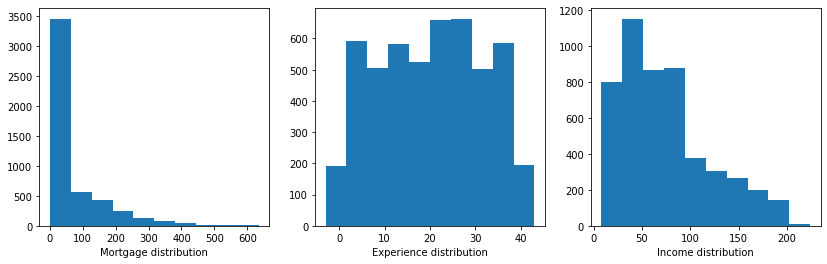

In [18]:
fig, [ax0, ax1, ax2] = plt.subplots(1,3, figsize = (14,4))

ax0.hist(df.Mortgage)
ax0.set_xlabel('Mortgage distribution')


ax1.hist(df.Experience)
ax1.set_xlabel('Experience distribution')


ax2.hist(df.Income)
ax2.set_xlabel('Income distribution')


In [19]:
df[['ID','ZIP Code']] = df[['ID','ZIP Code']].astype('str')

In [20]:
df[['ID', 'ZIP Code']].dtypes

ID          object
ZIP Code    object
dtype: object

Checking for Negative Values

In [21]:
df[df['Experience'] < 0]['Experience'].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

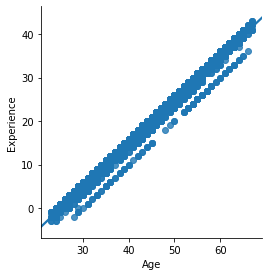

In [24]:
grid = sns.PairGrid(df, y_vars = 'Experience', x_vars = 'Age', height = 4)
grid.map(sns.regplot);

In [23]:
df[df['Experience'] < 0]['Age'].value_counts()

25    18
24    17
23    12
29     3
28     1
26     1
Name: Age, dtype: int64

Text(0.5, 1.0, 'Mortgage Distribution with KDE')

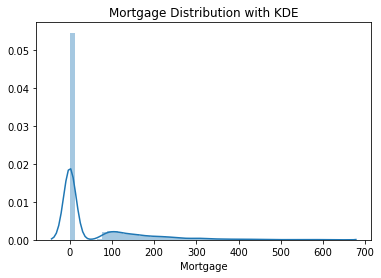

In [25]:
sns.distplot(df["Mortgage"])
plt.title("Mortgage Distribution with KDE")

Text(0.5, 1.0, 'Income Distribution')

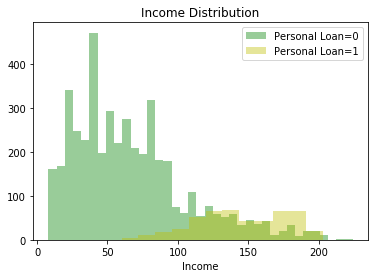

In [30]:
sns.distplot(df[df["Personal Loan"] == 0]['Income'], color = 'g',label='Personal Loan=0',kde=False)
sns.distplot(df[df["Personal Loan"] == 1]['Income'], color = 'y',label='Personal Loan=1',kde=False)
plt.legend()
plt.title("Income Distribution")

Text(0.5, 1.0, 'CC Average Distribution')

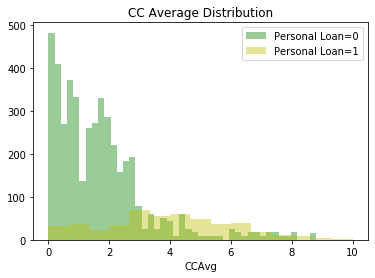

In [36]:
sns.distplot(df[df["Personal Loan"] == 0]['CCAvg'], color = 'g',label='Personal Loan=0',kde=False)
sns.distplot(df[df["Personal Loan"] == 1]['CCAvg'], color = 'y',label='Personal Loan=1',kde=False)
plt.legend()
plt.title("CC Average Distribution")

Text(0.5, 1.0, 'Experience Distribution')

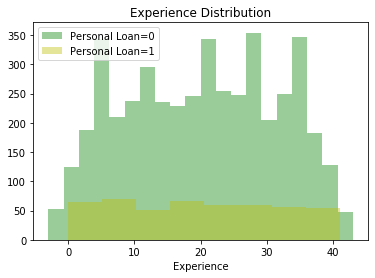

In [35]:
sns.distplot(df[df["Personal Loan"] == 0]['Experience'], color = 'g',label='Personal Loan=0',kde=False)
sns.distplot(df[df["Personal Loan"] == 1]['Experience'], color = 'y',label='Personal Loan=1',kde=False)
plt.legend()
plt.title("Experience Distribution")

Text(0.5, 1.0, 'Securities Account Countplot')

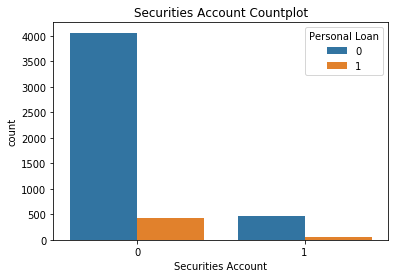

In [40]:
sns.countplot(x='Securities Account',data=df,hue='Personal Loan')
plt.title("Securities Account Countplot")

Text(0.5, 1.0, 'Family Countplot')

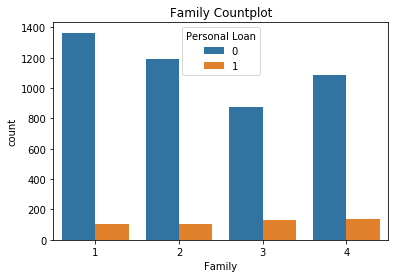

In [41]:
sns.countplot(x='Family',data=df,hue='Personal Loan')
plt.title("Family Countplot")

Text(0.5, 1.0, 'Education and Income Boxplot')

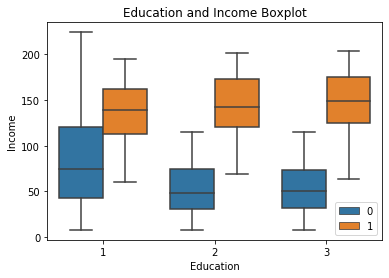

In [42]:
sns.boxplot(x='Education',data=df,hue='Personal Loan',y='Income')
plt.legend()
plt.title("Education and Income Boxplot")

Text(0.5, 1.0, 'Family and Income Boxplot')

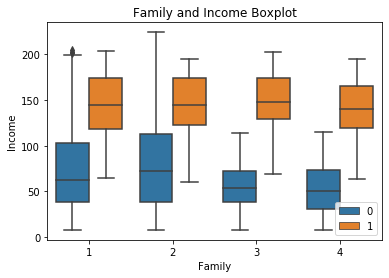

In [44]:
sns.boxplot(x='Family',data=df,hue='Personal Loan',y='Income')
plt.legend()
plt.title("Family and Income Boxplot")